In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b>Load</b>

In [2]:
tensor = np.load('tensor.npy')
kernel = np.load('kernel.npy')
bias = np.load('bias.npy')
stride =  pd.read_csv('task.csv')['stride'][0]

<b>Shape</b>

In [3]:
print(f'tensor{tensor.shape}\nkernel{kernel.shape}\nbias{bias.shape}\nstride={stride}')

tensor(2, 10, 13, 3)
kernel(7, 7, 3, 5)
bias(5,)
stride=3


<b>Convolution</b>

In [4]:
def conv(tensor, kernel, bias, stride):
    #in 
    N = tensor.shape[0]
    c_in = tensor.shape[3]
    H, W = tensor.shape[1], tensor.shape[2]
    kh = kernel.shape[0]
    kw = kernel.shape[1]
    
    #out
    
    c_out = kernel.shape[3]
    H_out = int((H-kh)/stride+1)
    W_out = int((W-kw)/stride+1)
    
    Y = np.zeros((N, H_out, W_out, c_out))
    
    for batch in range(N):
        for cout in range(c_out):            
            cards = np.zeros((H_out, W_out, c_in))
            
            for cin in range(c_in):
                card = np.zeros((H_out, W_out))
                
                for i in range(H_out):
                    for j in range(W_out):      
                        to_mul = tensor[batch,i*stride:kh+i*stride,j*stride:kw+j*stride,cin]
                        card[i][j] = np.sum(to_mul*kernel[:,:,cin,cout])
                    

                cards[:,:,cin] = card
                                  
            Y[batch,:,:,cout]=np.sum(cards, axis=2)+bias[cout]           
                        

    return Y

        

<b>Original tensor</b>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


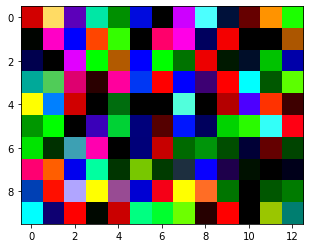

In [5]:
plt.imshow(tensor[0])
plt.show()

<b>One card of tensor after Convolution </b>

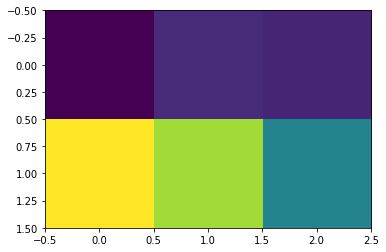

In [6]:
Y = conv(tensor, kernel,bias,stride)
plt.imshow(Y[0,:,:,3])
plt.show()

<b> Five cards of two "images" </b>

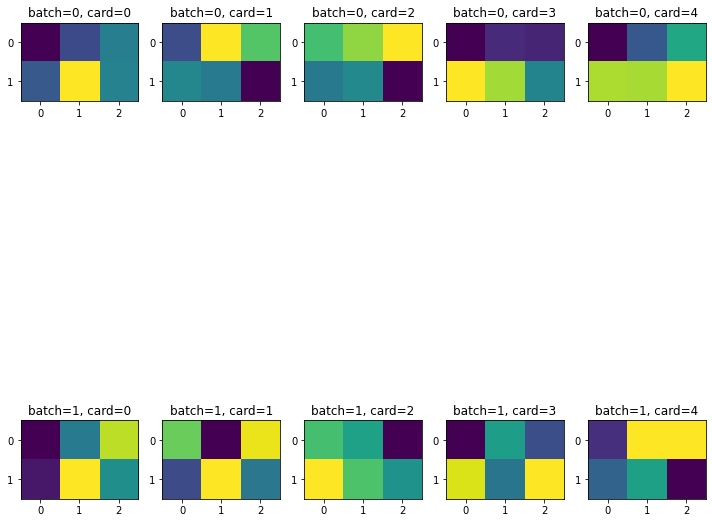

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10,15)) 


for i, image in enumerate(Y):
    for j in range(image.shape[2]):
        axes[i,j].imshow(image[:,:,j])
        axes[i,j].set_title(f'batch={i}, card={j}')
        

plt.tight_layout()